# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

C:\Users\alexander.dubovik\AppData\Local\Temp\ipykernel_11960\2227965259.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


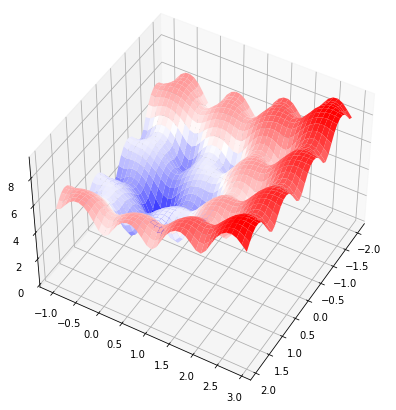

In [3]:
fig = plt.figure(figsize = [10, 7])
ax = fig.gca(projection = '3d')
ax.view_init(45, 30)

X = np.arange(-2, 2, 0.1)
Y = np.arange(-1, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = ackley(np.array([X, Y]))

surf = ax.plot_surface(X, Y, Z, cmap = 'bwr')
plt.show()

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Испытания стратегий:
- 'best1bin'
- 'best1exp'
- 'rand1exp'
- 'randtobest1exp'
- 'currenttobest1exp'
- 'best2exp'
- 'rand2exp'
- 'randtobest1bin'
- 'currenttobest1bin'
- 'best2bin'
- 'rand2bin'
- 'rand1bin'

In [4]:
strat = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 
         'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res_stat = {}
X = []
Y = []

def nearest(lst, target):
    return min(lst, key=lambda x: abs(x-target))

def farthest(lst, target):
    return max(lst, key=lambda x: abs(x-target))

def minimum_(lst, target):
    return min(lst, key=lambda x: (x-target))

for i in strat:
    result1 = differential_evolution(ackley, bounds, seed=42, strategy = i)
    res_stat.update({result1.nit:(result1.nit, result1.nfev, i)})
    Y.append(result1.nit)
    X.append(i)



In [5]:
tmp_n = res_stat[(nearest(res_stat.keys(), result.nit))]
tmp_f = res_stat[(farthest(res_stat.keys(), result.nit))]

print(f'\n Исходные значения, без указания метода: nfev = {result.nfev}, nit = {result.nit}.\n'
      f' Метод: {tmp_n[2]} имеет самые ближайшие значения nfev = {tmp_n[1]}, nit = {tmp_n[0]}.\n')

print(f' Метод: {tmp_f[2]} имеет самые большие, а значит большее кол-во оценок и больше иттераций, значения nfev = {tmp_f[1]}, nit = {tmp_f[0]}.\n')


 Исходные значения, без указания метода: nfev = 2793, nit = 90.
 Метод: best1bin имеет самые ближайшие значения nfev = 2793, nit = 90.

 Метод: currenttobest1bin имеет самые большие, а значит большее кол-во оценок и больше иттераций, значения nfev = 30093, nit = 1000.



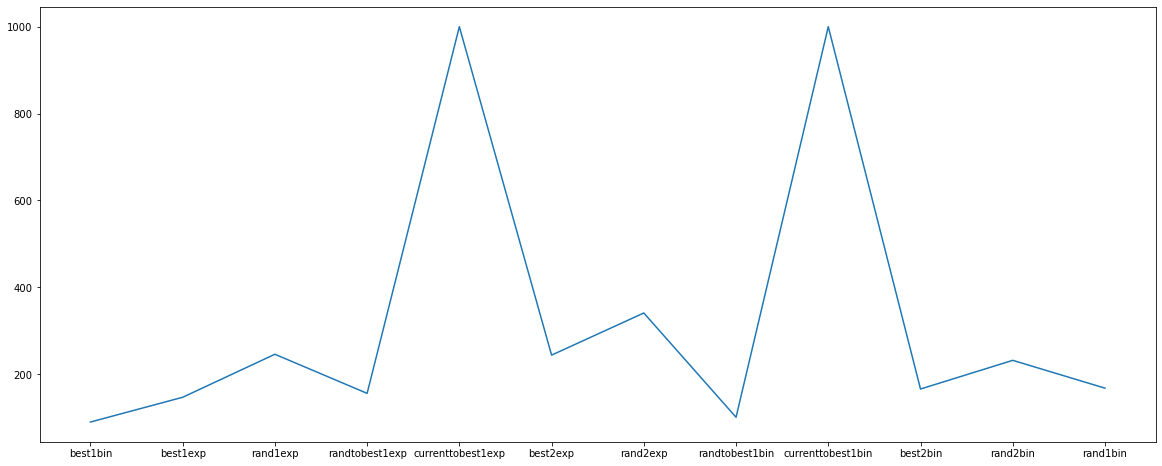

In [6]:
plt.figure(figsize=(20, 8))
plt.plot(X, Y)
plt.show()

In [7]:
X1 = []
Y1 = []
res_stat1 = {}
for i in range(0, 100):
    result2 = differential_evolution(ackley, bounds, seed=42, strategy = 'best1bin', popsize=i )
    Y1.append(result2.nit)
    X1.append(i)
    if result2.fun == result.fun:
        res_stat1.update({result2.nit:(result2.nit, result2.nfev, i)})
        # Y1.append(result2.nit)
        # X1.append(i)

In [8]:
tmp_n1 = res_stat1[(minimum_(res_stat1.keys(), result1.nit))]

print(f'\n Исходные значения, без параметра popsize: nfev = {result.nfev}, nit = {result.nit}.\n'
      f' Идеальный параметр: {tmp_n1[2]} имеет самые маленькие значения nfev = {tmp_n1[1]}, nit = {tmp_n1[0]}.\n')



 Исходные значения, без параметра popsize: nfev = 2793, nit = 90.
 Идеальный параметр: 7 имеет самые маленькие значения nfev = 1295, nit = 87.



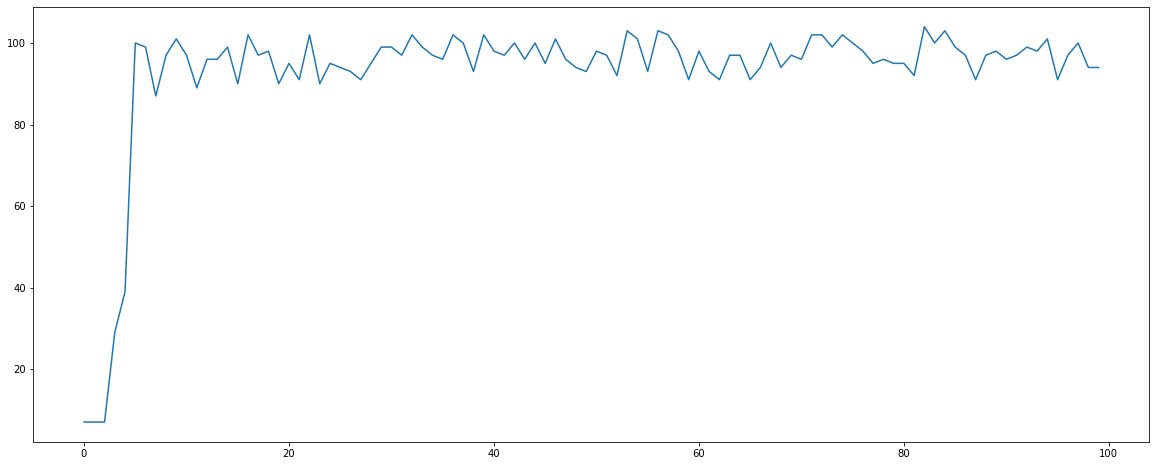

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(X1, Y1)
plt.show()

In [10]:
X2 = []
X3 = []
Y2 = []
res_stat2 = {}
for i in np.arange(0.1, 1.9, 0.1):
    for j in np.arange(0.1, 1.9, 0.1):
        if i <= j:
            result3 = differential_evolution(ackley, bounds, seed=42, strategy = 'best1bin', popsize=7, mutation = (i, j))
            Y2.append(result3.nit)
            X2.append(i)
            X3.append(j)
            if result3.fun == result.fun:
                res_stat2.update({result3.nit:(result3.nit, result3.nfev, i, j)})
                


In [11]:
tmp_n2 = res_stat2[(minimum_(res_stat2.keys(), result2.nit))]

print(f'\n Исходные значения, без параметра popsize: nfev = {result.nfev}, nit = {result.nit}.\n'
      f' Идеальный параметр: i = {tmp_n2[2]}, j = {tmp_n2[3]} имеет самые маленькие значения nfev = {tmp_n2[1]}, nit = {tmp_n2[0]}.\n')



 Исходные значения, без параметра popsize: nfev = 2793, nit = 90.
 Идеальный параметр: i = 0.1, j = 0.7000000000000001 имеет самые маленькие значения nfev = 707, nit = 45.



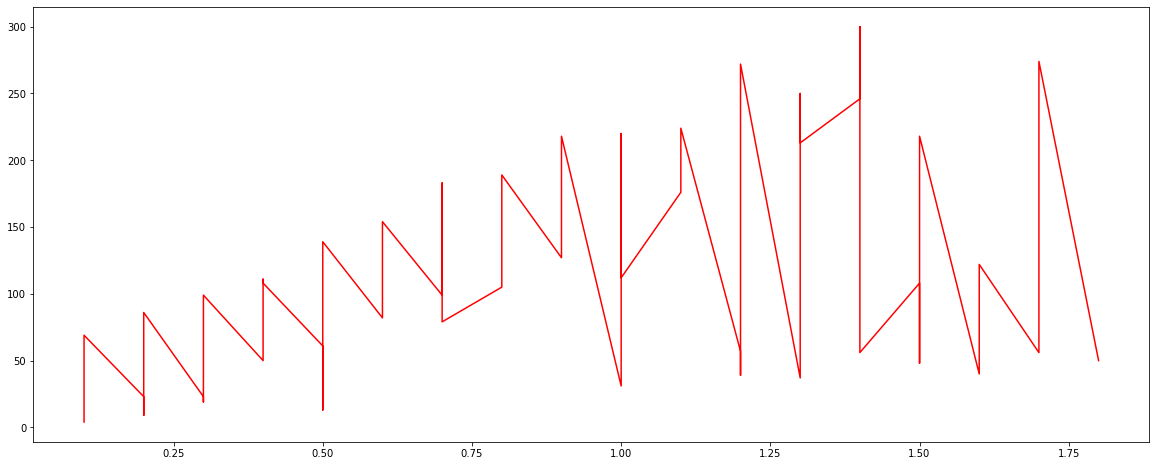

In [12]:
plt.figure(figsize=(20, 8))
plt.plot(X2, Y2, color = 'red')
# plt.plot(X3, Y2)
plt.show()

___

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [13]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [14]:
result_m.nit

8

In [15]:
meth = ['Nelder-Mead', 'Powell', 'CG', 'BFGS',  'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP']


In [18]:
# res_stat_m1 = {}
# Xm = []
# Ym = []

In [19]:
# for i in meth:
#     result_m1 = minimize(ackley, x0,  method=i)
#     res_stat_m1.update({result_m1.nit:(result_m1.nit, result_m1.nfev, i)})
#     Ym.append(result_m1.nit)
#     Xm.append(i)

In [20]:
# plt.figure(figsize=(20, 8))
# plt.plot(Xm, Ym, color = 'red')
# # plt.plot(X3, Y2)
# plt.show()

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
